In [1]:
import pandas as pd

In [2]:
from sklearn import preprocessing

In [3]:
df = pd.read_csv('../../Github/jspwiki/jspwiki_model.csv')

In [4]:
df['time'] = df['total_time'].astype('int64')

In [5]:
X = df.loc[:, ~df.columns.isin(['begin_sha', 'end_sha', 'begin_time', 'end_time'
                                'total_time'
                                ])]

In [6]:
scaler = preprocessing.StandardScaler()
df_scaler = scaler.fit_transform(X)
df_scaler_col = pd.DataFrame(df_scaler)
df_scaler = df_scaler.T

In [7]:
#Silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
number_of_cluster = []

for i in range(2, len(df_scaler)):
    km = KMeans(n_clusters = i)
    km.fit(df_scaler)
    sil_avg = silhouette_score(df_scaler, km.labels_).round(4)
    number_of_cluster.append([sil_avg , i])

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [9]:
print(f'Optimum number of cluster: {max(number_of_cluster)[1]}')

Optimum number of cluster: 9


In [10]:
# Perform KMeans clustering
num_clusters = max(number_of_cluster)[1]
kmeans = KMeans(n_clusters=num_clusters)

In [11]:
cluster_labels = kmeans.fit_predict(X)

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
df['cluster'] = cluster_labels

In [25]:
df['timedelta'][:int(0.7 * len(df))].median()

Timedelta('7 days 15:29:07')

In [13]:
df.head(3)

,begin_sha,end_sha,commits,additions,deletions,changed_files,total_time,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,time,cluster
0,37bf55373ed5a739a388a720163cf51d1104537f,96b6b3f67c5915bac9c77bcd81fe5529d9b9e06b,1,0,9,8,522851000000000,1066,89,89,234,234,1066,86,86,234,461,522851000000000,7
1,402375b9cc0a5bddac483a557e2d7253d0fc1b5d,116c0c23629ab9f8b80befcf7f8f05bd15b0beeb,1,36,40,4,7097003000000000,1064,77,77,183,183,1054,77,77,183,458,7097003000000000,2
2,7b1d9eaaacd747d78482a2bd7d94784cc7443cb0,6256f8b8c4a147b676471ea96e26b33386b43f0f,1,2,0,2,16947264000000000,1055,78,78,188,188,1054,77,77,183,458,16947264000000000,1


In [14]:
df.shape

(83, 19)

In [15]:
df['timedelta'] = pd.to_timedelta(df['time'])

In [16]:
cluster_0 = df[df['cluster'] == 0]
print(cluster_0['timedelta'].min())
print(cluster_0['timedelta'].max())
cluster_0.shape

0 days 00:01:30
5 days 04:28:32


(43, 20)

In [17]:
cluster_1 = df[df['cluster'] == 1]
print(cluster_1['timedelta'].min())
print(cluster_1['timedelta'].max())
cluster_1.shape

190 days 00:41:58
197 days 22:09:25


(3, 20)

In [18]:
cluster_2 = df[df['cluster'] == 2]
print(cluster_2['timedelta'].min())
print(cluster_2['timedelta'].max())
cluster_2.shape

79 days 00:03:25
86 days 02:25:46


(3, 20)

In [19]:
cluster_3 = df[df['cluster'] == 3]
print(cluster_3['timedelta'].min())
print(cluster_3['timedelta'].max())
cluster_3.shape

280 days 00:57:41
280 days 00:57:41


(1, 20)

In [20]:
cluster_4 = df[df['cluster'] == 4]
print(cluster_4['timedelta'].min())
print(cluster_4['timedelta'].max())
cluster_4.shape

16 days 17:54:11
26 days 17:24:20


(10, 20)

In [21]:
cluster_5 = df[df['cluster'] == 5]
print(cluster_5['timedelta'].min())
print(cluster_5['timedelta'].max())
cluster_5.shape

43 days 06:43:09
50 days 10:40:36


(2, 20)

In [22]:
cluster_6 = df[df['cluster'] == 6]
print(cluster_6['timedelta'].min())
print(cluster_6['timedelta'].max())
cluster_6.shape

157 days 23:02:25
168 days 22:03:58


(2, 20)

In [23]:
cluster_7 = df[df['cluster'] == 7]
print(cluster_7['timedelta'].min())
print(cluster_7['timedelta'].max())
cluster_7.shape

5 days 14:02:05
14 days 04:54:58


(18, 20)

In [24]:
cluster_8 = df[df['cluster'] == 8]
print(cluster_8['timedelta'].min())
print(cluster_8['timedelta'].max())
cluster_8.shape

99 days 02:15:42
99 days 02:15:42


(1, 20)

In [26]:
df.shape

(83, 20)

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_scaler)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.43486709 0.16779965]
[22.97082082 14.26900771]


In [42]:
pca_svd = PCA(n_components=2, svd_solver='full')
pca_svd.fit(df_scaler)
print(pca_svd.explained_variance_ratio_)
print(pca_svd.singular_values_)

[0.43486709 0.16779965]
[22.97082082 14.26900771]


In [45]:
pca3 = PCA(n_components=1, svd_solver='arpack')
pca3.fit(df_scaler)
print(pca3.explained_variance_ratio_)
print(pca3.explained_variance_)
print(pca3.singular_values_)


[0.43486709]
[35.1772406]
[22.97082082]


In [47]:
# print(pca3.mean_)
# print(pca3.components_)

[[ 0.12839435  0.19139898  0.2447359   0.24819431  0.19789463  0.20281806
   0.16650966  0.25399289  0.10730243  0.12208231  0.14417193  0.10647694
   0.10674174  0.10968242  0.11695371  0.12572757  0.12477609  0.13424858
   0.11670834  0.06555475  0.06776426  0.0626406   0.06050976  0.07034431
   0.07582625  0.06948633  0.05736587  0.04884218  0.04916136  0.05025013
   0.04646282  0.04690194  0.05093345  0.04847682  0.00371934  0.00789074
   0.0078915   0.00792138  0.00789139  0.00789139 -0.02565269 -0.09697765
  -0.09697765 -0.09697765 -0.09697765 -0.0968179  -0.09330709 -0.10450929
   0.13521361 -0.0919131  -0.05666259 -0.05839618 -0.05047056 -0.07324566
  -0.09302954 -0.09145894 -0.09217559 -0.09462131 -0.09217559 -0.09462131
  -0.09465116 -0.09807828 -0.09465116 -0.09807828 -0.09804795 -0.09195446
  -0.09804795 -0.09195446 -0.09198346 -0.09198346 -0.09198346 -0.09198346
  -0.09214156 -0.09019392 -0.09019401 -0.09019449 -0.03927477 -0.07595752
  -0.09140815 -0.13416735 -0.15892717 

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


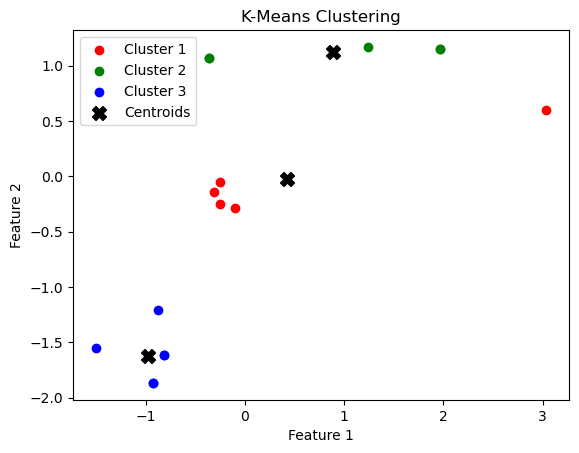

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(0)
n_samples = 83
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_scaler)
labels = kmeans.labels_

colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i in range(n_clusters):
    cluster_points = df_scaler[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, color='black', marker='X', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()